In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
from TSP_utils import TSP_solver, TSP_plotter, TSP_generator, TSP_loader
import numpy as np
import networkx as nx
import tqdm
import tsplib95
import time

In [20]:
solver = TSP_solver()
generator = TSP_generator(g_type='tsp_2d', num_min=15, num_max=15)

In [21]:
graph = generator.gen_graph()

tour_length, time, tour = solver.calc_opt_tour_from_nx(graph, scale=8)

In [22]:
solver.calc_tour_length(graph, tour)

3.5051406559528737

In [23]:
tour_length

3.50514063

In [24]:
def add_node(graph, cur_sol, new_node):
    cur_dist = 10000000.0
    if cur_sol == []:
        cur_sol.append(new_node)
        return 0
    for i in range(0, np.array(cur_sol).shape[0]):
        if i + 1 == np.array(cur_sol).shape[0]:
            adj = cur_sol[0]
        else:
            adj = cur_sol[i + 1]
        if cur_sol[i] == adj:
            cost = graph[new_node][cur_sol[i]]['weight'] + graph[new_node][adj]['weight']
        else:
            cost = graph[new_node][cur_sol[i]]['weight'] + graph[new_node][adj]['weight'] - graph[cur_sol[i]][adj]['weight']
        if cost < cur_dist:
            cur_dist = cost
            pos = i + 1
    cur_sol.insert(pos, new_node)
    return  cur_dist

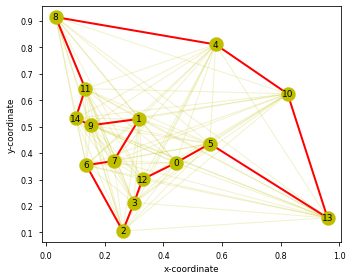

In [35]:
plotter = TSP_plotter()
plotter.plot_nx_graph(graph, draw_edges=True, tour_length=None, solution=list(tour), title='')

In [36]:
cur_sol = []
tour_len_help = 0
for node in tour:
    tour_len_help += add_node(graph, cur_sol, node)
print(solver.calc_tour_length(graph, cur_sol))
print(tour_len_help)

3.6418370284284807
3.6418370284284816


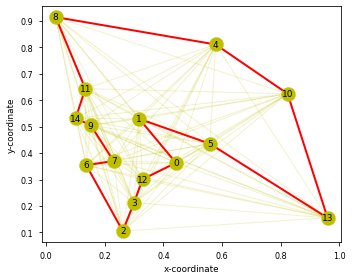

In [37]:
plotter.plot_nx_graph(graph, draw_edges=True, tour_length=None, solution=list(cur_sol), title='')